# TestCase 5

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config5.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 5
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 0}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
high_degree = 10

In [4]:
assert testcase == 5
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/flecourtier/Bureau/Article1/code


In [8]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
if version == 1:
    from testcases.networks.test_2D.test_5.test_5_v1 import Run_laplacian2D,Poisson_2D
elif version == 2:
    from testcases.networks.test_2D.test_5.test_5_v2 import Run_laplacian2D,Poisson_2D 
elif version == 3:
    from testcases.networks.test_2D.test_5.test_5_v3 import Run_laplacian2D,Poisson_2D 
from testcases.problem.problem_2D import TestCase5
problem = TestCase5(version=version)

Using device: cpu
torch loaded; device is cpu


bigcenter :  [0.0, 0.0]
bigradius :  1.0
smallcenter :  [0.0, 0.0]
smallradius :  0.25
Threshold of the sampling:  0.0
init
Threshold of the sampling:  0.0
init
>> load network /home/flecourtier/Bureau/Article1/code/networks/test_2D/test_fe5.pth
network loaded
Error  tensor([0.0009])


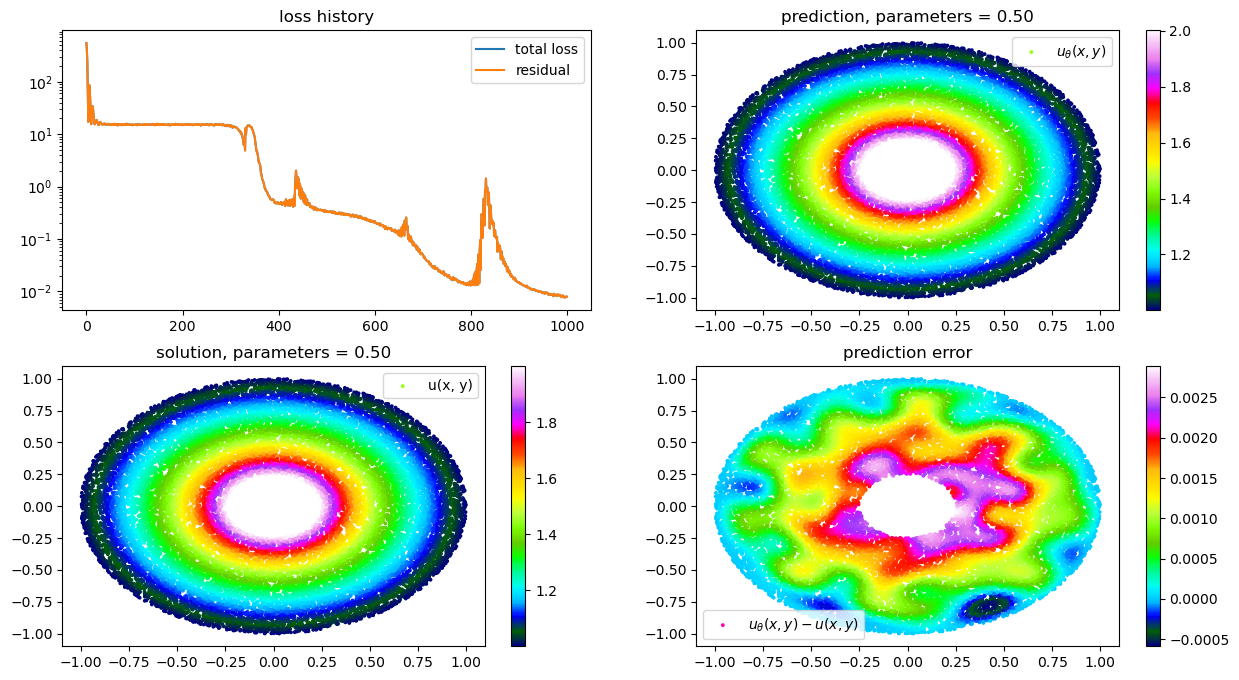

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [ ]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree1.csv


## Read csv file : /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree1.csv
## Read csv file : /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree2.csv
## Read csv file : /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree3.csv


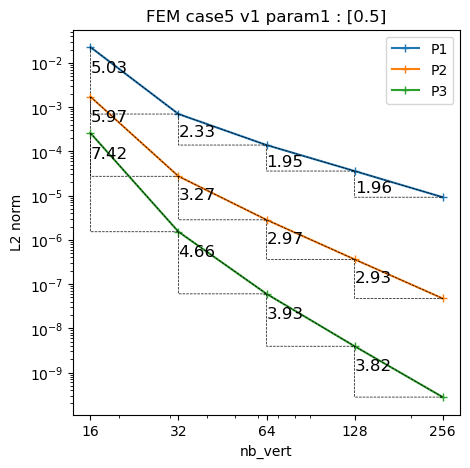

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [ ]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/Corr_case4_v1_param1_degree1.csv
## Run error estimation with Corr (add) for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
Time to generate V_ex:  20.59114718437195
Time to generate mesh:  0.0042536258697509766
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Time to assemble the matrix :  1.7735555171966553
Time to solve the system : 0.01912713050842285
u_theta_Vex
u_ex
uex_Vex
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Time to compute the error : 7.006789922714233
nb_vert=16, norme_L2=2.254341785383592e-06
Computed bounding box tree with 746807 nodes for 373404 points.

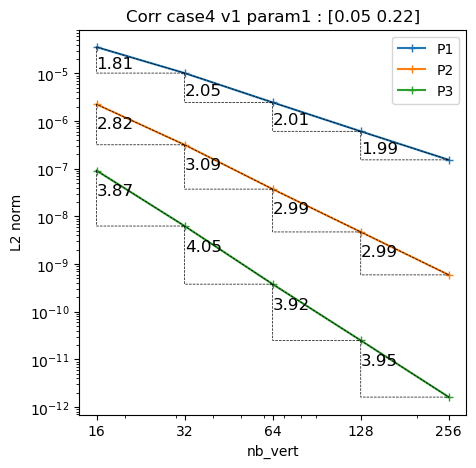

In [ ]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

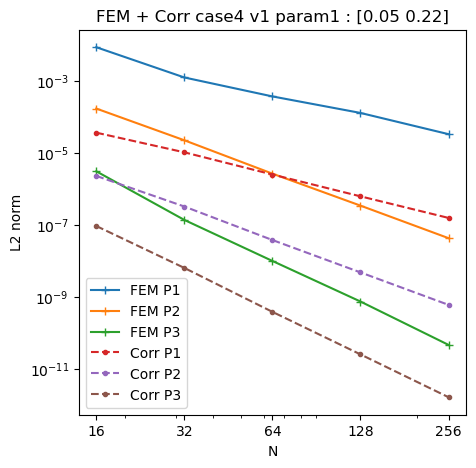

In [ ]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [ ]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp